# Capstone Projects Ideas

## 1. Predict Energy Requirement based on Building Attributes

Predict the heating and cooling load for a building based on its attributes such as glazing area, compactness, surface area, wall height etc. The data was generated using simulation software 'Ecotect'. This software is owned by Autodesk.

[Link](http://archive.ics.uci.edu/ml/datasets/Energy+efficiency)

## 2. Predict Breast Cancer diagnosis using biopsy data

Predict the diagnosis (i.e. malignant or benign) of biopsy using the cell attributes from biopsy. The attributes are discrete and have only certain values.

[Link](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Original%29)

## 3. Predict Epileptic Seizures

Predict epileptic seizure from time series EEG data. 

Time series data containing EEG readings. The EEG data are sampled at 178 datapoints per sec. At the end of each second, the patient's state is recorded in numbers from 1 to 5. Number 1 meaning the patient is having a seizure.

[Link](http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition)


# Select Project number 2 - Predict Breast Cancer diagnosis using biopsy data.


# Code to Build Random Forest Classifier

## Data Wrangling

Index(['ID', 'Clump Thickness', 'Uniformity of Cell Sizes',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


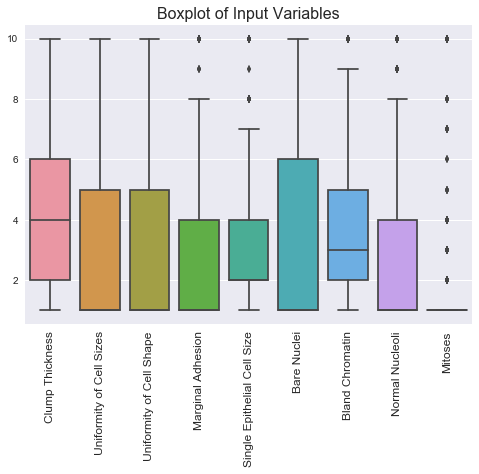

       Clump Thickness  Uniformity of Cell Sizes  Uniformity of Cell Shape  \
count       683.000000                683.000000                683.000000   
mean          4.442167                  3.150805                  3.215227   
std           2.820761                  3.065145                  2.988581   
min           1.000000                  1.000000                  1.000000   
25%           2.000000                  1.000000                  1.000000   
50%           4.000000                  1.000000                  1.000000   
75%           6.000000                  5.000000                  5.000000   
max          10.000000                 10.000000                 10.000000   

       Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
count         683.000000                   683.000000   683.000000   
mean            2.830161                     3.234261     3.544656   
std             2.864562                     2.223085     3.643857   
min             1

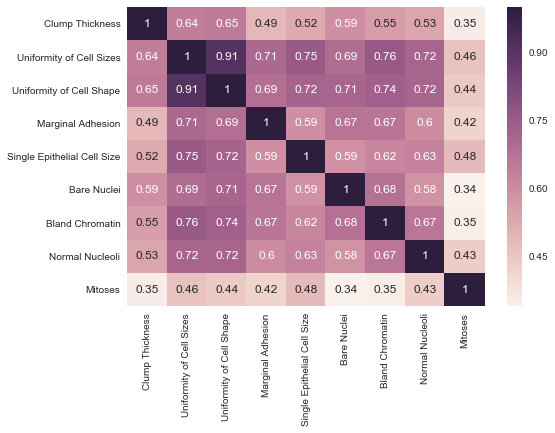

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# Read Data & Remove rows with NA's
df_with_na = pd.read_excel('Breast Cancer Data in Excel.xlsx', sheetname='Sheet1', header=0)
rows_with_na = []

# Dropna function did not work on this dataframe. So the code below was used.
for i in range(df_with_na.shape[0]):
    if(sum(np.isnan(df_with_na.iloc[i,:]))>0):
        rows_with_na.append(i)

df = df_with_na.drop(rows_with_na)

# Inspect Input Variables
print(df.columns)
bxplot = sns.boxplot(data=df.iloc[:,1:10])
#bxplot = sns.swarmplot(data=df.iloc[:,1:10], color=".25")
bxplot.set_xticklabels(df.columns[1:10], rotation=90, fontsize=12)
plt.title('Boxplot of Input Variables', fontsize=16)
plt.savefig('foo.png', dpi = 200)
plt.show()

input_variables = df.iloc[:,1:10]
print(input_variables.describe())

# Look at the correlation in the predictor variables
corr = df.iloc[:,1:10].corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)
plt.show()

[ 0.92207792  0.92207792  0.94805195  0.94736842  0.94736842  0.96
  0.98666667  0.98666667  0.98666667]
Confusion Matrix
                     Actual Benign  Actual Malignant
Predicted Benign                47                 0
Predicted Malignant              1                21
Identifying Important Features


/Users/Murali/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


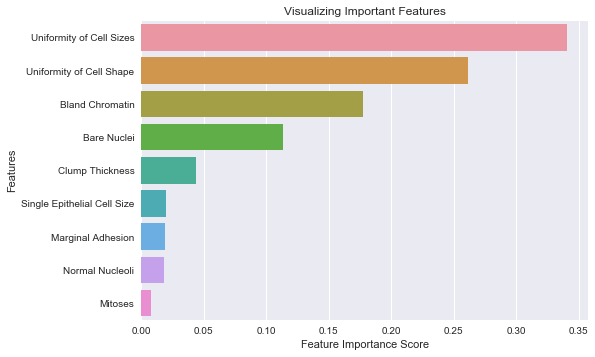

In [12]:
# Build Random Forest Classifier Model using 10 fold cross validation.
X = df.iloc[:,1:10] # First column is ID and is excluded from the analysis.
y = df.iloc[:,10]

clf = RandomForestClassifier(n_estimators=10, max_depth=None,
                             min_samples_split=2, random_state=101)
scores = cross_val_score(clf, X, y, cv=9)
print(scores)
#========================================================================================

# Build Random Forest Classifier using 90% of the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101) # 10% Test Data
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
confusion_matrix_results = confusion_matrix(y_test, y_pred)
cols = ['Actual Benign', 'Actual Malignant']
inds = ['Predicted Benign', 'Predicted Malignant']
confusion_matrix_results_df = pd.DataFrame(confusion_matrix_results, index=inds, columns=cols)
print('Confusion Matrix')
print(confusion_matrix_results_df)
print('=========================')
#========================================================================================

# Identify important features
print('Identifying Important Features')
feature_imp = pd.Series(clf.feature_importances_, index = df.columns[1:10]).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
#========================================================================================



# Tips from Alex

1. Check if the predictors are correlated.

2. It is helpful to transform the variable. For example, extremely skewed variable could be applied logarithm. Some times, the data can be scaled (x - Mu)/sigma. THis may not be used

3. Class imbalance: How many cases are cancerous vs benign? Subsample benign class such that you have 50/50.

4. 10 fold cross validation.

5. Regression is sometimes preferred since the model parameters have meaning.


1. Make a confusion matrix. Keeps track of false positives & negatives.

2. How to get confidence in predictions? It is likely that scikit learn may not have this built in.

3. When you have 10 fold cross validation, you have 10 models. Which model do you end up using?

The 10 fold cross validation is just to get the accuracy of the model. At the end, the final model is built using 100%.